### **Purpose: ** 

In [32]:
player = 'Nick van den Berg'
team = 'eu'

In [33]:
import pickle
import pandas as pd

In [34]:
# path = '//DREW/Users/andrew/Desktop/mosconi/'
# dframe = pickle.load(open(path+'pkl/allyears_clean_locs','rb'))
# if 'a' in team.lower():
#     #could solve by changing dframe instead of df
#     df = dframe[dframe['American_player'].str.contains(player)]
#     df['Europe_lost'] = ~ df['Europe_won']
#     df = df[['Format', 'European_player', 'European_score', 'American_score',
#        'American_player', 'Europe_lost','Europe_won']]
#     df.columns = ['Format', 'European_player', 'European_score', 'American_score',
#        'American_player', 'America_won', 'America_lost']
# else:
#     df = dframe[dframe['European_player'].str.contains(player)]
#     df['Europe_lost'] = ~ df['Europe_won']

In [35]:
path = '//DREW/Users/andrew/Desktop/mosconi/'
dframe = pickle.load(open(path+'pkl/allyears_clean_locs','rb'))
dframe['Europe_lost'] = ~ dframe['Europe_won']
if 'a' in team.lower():
    df = dframe[dframe['American_player'].str.contains(player)]
    df = df[['Format', 'European_player', 'European_score', 'American_score',
       'American_player', 'Europe_lost','Europe_won']]
    df.columns = ['Format', 'European_player', 'European_score', 'American_score',
       'American_player', 'America_won', 'America_lost']
else:
    df = dframe[dframe['European_player'].str.contains(player)]

In [36]:
def stats(df):
    try:
        if 'a' in team.lower():
            win = df['America_won'].sum()
            loss = df['America_lost'].sum()
        else:
            win = df['Europe_won'].sum()
            loss = df['Europe_lost'].sum()
        mp= win+loss
        wl = 'Win-loss: {}-{}'.format(win,loss)
        pct = round(win/(win+loss)*100,0)
        return('Matches Played: {}'.format(mp),wl,'Pct: {}'.format(pct))
    except:
        return('No matches to display')

### Lets have a quick look at his overall stats by checking out his singles, doubles, and team stats.

In [37]:
sing = df[df['Format']=='Singles']
dub = df[df['Format']=='Doubles']
teams = df[df['Format']=='Teams']
triples = df[df['Format']=='Triples'] 

In [38]:
'Overall: {}'.format(stats(df))
'Singles: {}'.format(stats(sing))
'Doubles: {}'.format(stats(dub))
'Teams:   {}'.format(stats(teams))
'Triples: {}'.format(stats(triples))

"Overall: ('Matches Played: 40', 'Win-loss: 15-25', 'Pct: 38.0')"

"Singles: ('Matches Played: 14', 'Win-loss: 6-8', 'Pct: 43.0')"

"Doubles: ('Matches Played: 18', 'Win-loss: 7-11', 'Pct: 39.0')"

"Teams:   ('Matches Played: 6', 'Win-loss: 2-4', 'Pct: 33.0')"

"Triples: ('Matches Played: 1', 'Win-loss: 0-1', 'Pct: 0.0')"

## So he plays better in singles matches. 
## Interestingly, he has done poorly in teams matches. May be worth looking to see if that had an effect on the team's overall win percentage. (whether team win---> tournament win)
### Let's see if he plays better with certain partners. 

In [57]:
if 'a' in team.lower():
    dub = dub[['European_player','American_player','America_won','America_lost']]
    dub['Partner']=dub.loc[:,'American_player'].str.replace(player,'')
    dub['Partner']=dub.loc[:,'Partner'].str.replace('&','')
    dub['Partner']=dub.loc[:,'Partner'].str.strip()
    dub.groupby('Partner').sum().sort_values(['America_won','America_lost'],ascending=False)    
else:
    dub = dub[['European_player','American_player','Europe_won','Europe_lost']]
    dub['Partner']=dub.loc[:,'European_player'].str.replace(player,'')
    dub['Partner']=dub.loc[:,'Partner'].str.replace('&','')
    dub['Partner']=dub.loc[:,'Partner'].str.strip()
    dub.groupby('Partner').sum().sort_values(['Europe_won','Europe_lost'],ascending=False)

,Europe_won,Europe_lost
Partner,,
Steve Davis,2.0,3.0
Niels Feijen,1.0,2.0
Imran Majid,1.0,1.0
Karl Boyes,1.0,0.0
Mika Immonen,1.0,0.0
Nick Ekonomopoulos,1.0,0.0
Chris Melling,0.0,2.0
Darren Appleton,0.0,2.0
Ralf Souquet,0.0,1.0


In [56]:
dub

European_player  \
Year Location                       Match                                         
2002 Bethnal Green, London, England 2             Steve Davis Nick van den Berg   
                                    5             Steve Davis Nick van den Berg   
                                    11            Steve Davis Nick van den Berg   
2003 Las Vegas, Nevada, USA         3             Steve Davis Nick van den Berg   
                                    6             Steve Davis Nick van den Berg   
2006 Rotterdam, Netherlands         5             Nick van den Berg Imran Majid   
                                    9             Nick van den Berg Imran Majid   
2010 Bethnal Green, London, England 1            Nick van den Berg Ralf Souquet   
                                    10        Darren Appleton Nick van den Berg   
                                    13           Mika Immonen Nick van den Berg   
2011 Las Vegas, Nevada, USA         1           Chris Melling Nick van den Berg   
                                    5            Nick van den Berg Niels Feijen   
2012 Bethnal Green, London, England 1           Chris Melling Nick van den Berg   
                                    7            Niels Feijen Nick van den Berg   
                                    10     Nick van den Berg Nick Ekonomopoulos   
2015 Las Vegas, Nevada, USA         1              Karl Boyes Nick van den Berg   
                                    5            Niels Feijen Nick van den Berg   
                                    9         Darren Appleton Nick van den Berg   

                                                           American_player  \
Year Location                       Match                                    
2002 Bethnal Green, London, England 2         Earl Strickland Jeremy Jones   
                                    5         Earl Strickland Jeremy Jones   
                                    11           Johnny Archer Nick Varner   
2003 Las Vegas, Nevada, USA         3         Earl Strickland Jeremy Jones   
                                    6          Tony Robles Earl Strickland   
2006 Rotterdam, Netherlands         5        Earl Strickland Rodney Morris   
                                    9               Corey Deuel Mike Davis   
2010 Bethnal Green, London, England 1           Dennis Hatch Rodney Morris   
                                    10      Shane Van Boening Dennis Hatch   
                                    13       Shane Van Boening Corey Deuel   
2011 Las Vegas, Nevada, USA         1           Johnny Archer Shawn Putnam   
                                    5      Shane Van Boening Johnny Archer   
2012 Bethnal Green, London, England 1          Johnny Archer Brandon Shuff   
                                    7           Dennis Hatch Brandon Shuff   
                                    10         Mike Dechaine Brandon Shuff   
2015 Las Vegas, Nevada, USA         1            Corey Deuel Mike Dechaine   
                                    5       Justin Bergman Skyler Woodward   
                                    9      Shane Van Boening Mike Dechaine   

                                          Europe_won Europe_lost  \
Year Location                       Match                          
2002 Bethnal Green, London, England 2           True       False   
                                    5           True       False   
                                    11         False        True   
2003 Las Vegas, Nevada, USA         3          False        True   
                                    6          False        True   
2006 Rotterdam, Netherlands         5           True       False   
                                    9          False        True   
2010 Bethnal Green, London, England 1          False        True   
                                    10         False        True   
                                    13          True       False   
2011 Las Vegas, Nevada, US

### Nothing too significant. Looks like he does poorly when partnered with Melling or Appleton.

## Let's see if he performs better or worse against certain opponents in singles matches.

In [40]:
if 'a' in team.lower():
    sing.groupby('European_player').sum().sort_values('America_won',ascending = False)
else:
    sing.groupby('American_player').sum().sort_values('Europe_won',ascending = False)

,Europe_won,Europe_lost
American_player,,
Corey Deuel,1.0,2.0
Earl Strickland,1.0,1.0
Johnny Archer,1.0,1.0
Mike Davis,1.0,0.0
Mike Dechaine,1.0,0.0
Tony Robles,1.0,0.0
Dennis Hatch,0.0,1.0
Shane Van Boening,0.0,3.0


## Apparently, he does rather poorly against Shane Van Boening.
## Let's see what his record was for each year.

In [41]:
lst =df.index.values.tolist() 
years = set([])
for item in lst:
    years.add(item[0])
years=list(years)

In [42]:
yearly=[]
for year in years:
    if 'a' in team:
        win = df.loc[year]['America_won'].sum()
        loss = df.loc[year]['America_lost'].sum()
    else:
        win = df.loc[year]['Europe_won'].sum()
        loss = df.loc[year]['Europe_lost'].sum()
    yearly.append((win,loss))

In [43]:
yr= {}
for k,v in zip(years,yearly):
    yr[k]=v

In [44]:
yr

{2002: (3, 2),
 2003: (1, 3),
 2006: (3, 5),
 2010: (2, 4),
 2011: (2, 4),
 2012: (3, 3),
 2015: (1, 4)}

In [45]:
win=[]
loss=[]
pct=[]
for w,l in yearly:
    win.append(w)
    loss.append(l)
    p=round((w*100/(w+l)),0)
    pct.append(p)

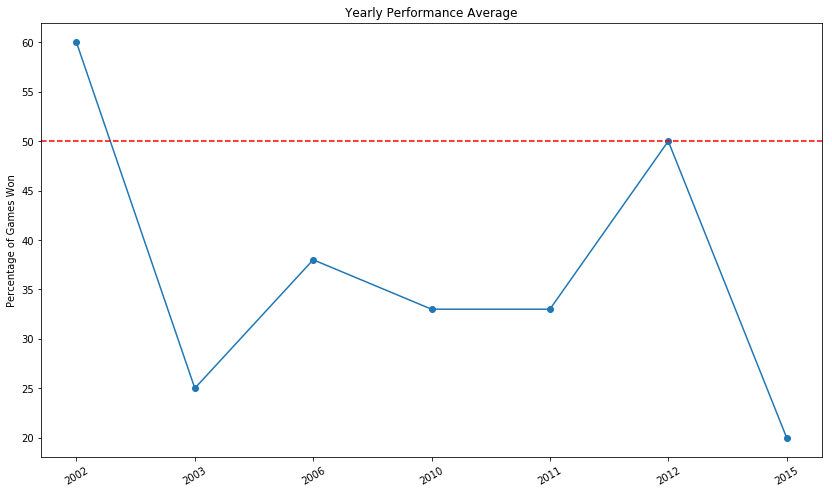

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ind = np.arange(len(years))  # the x locations for the groups

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

ax.plot(pct,linestyle='-',marker='.',markersize=12)
ax.axhline(50, color='r',linestyle='--')

# add some;
ax.set_ylabel('Percentage of Games Won');
ax.set_title('Yearly Performance Average');
ax.set_xticks(ind);
ax.set_xticklabels( (years),rotation=30 );

### So his worst years were: 2003, 2015 and his best years were: 2002, 2012. 
### Let's check how the team did each year he played.

In [47]:
def wincount(dframe=dframe,years=years):
    l=0
    w=0
    tie=0
    for year in years:
        f,t = dframe.loc[year]['Europe_won'].value_counts(sort=False)
        print(f,t)
        if f>t:
            l+=1
        elif f<t:
            w+=1
        else:
            tie+=1
    return 'win-loss-tie: {}-{}-{}'.format(w,l,tie)
wincount()

9 12
11 9
12 12
8 11
7 11
9 11
7 11


'win-loss-tie: 5-1-1'

### So Europe went 5-1-1 with him on the team.
### Let's dig a bit deeper to see how big of a factor location has been for his performance.

In [48]:
locs = pickle.load(open(path+'pkl/dloc','rb'))

In [49]:
hm = []
aw = []

for year in years:
    if 'USA' in locs[year]:
        if 'a' in team.lower():
            hm.append(year)
        else:
            aw.append(year)
    else:
        if 'a' in team.lower():
            aw.append(year)
        else:
            hm.append(year)
away = df.loc[aw]
home = df.loc[hm]

In [50]:
'Played home {} times, away {} times'.format(len(hm),len(aw))

'Home Games: {}'.format(stats(home))

'Away Games: {}'.format(stats(away))

'Played home 4 times, away 3 times'

"Home Games: ('Matches Played: 25', 'Win-loss: 11-14', 'Pct: 44.0')"

"Away Games: ('Matches Played: 15', 'Win-loss: 4-11', 'Pct: 27.0')"

### So he plays *significantly* better at home.

### Let's drill down a bit further to parse out his singles and doubles matches for both home and away 

In [51]:
hsing = stats(home[home['Format']=='Singles'])

In [52]:
hdub = stats(home[home['Format']=='Doubles'])

In [53]:
asing = stats(away[away['Format']=='Singles'])

In [54]:
adub = stats(away[away['Format']=='Doubles'])

In [55]:
'Home Singles: {}'.format(hsing)
'Home Doubles: {}'.format(hdub)
'Away Singles: {}'.format(asing)
'Away Doubles: {}'.format(adub)

"Home Singles: ('Matches Played: 8', 'Win-loss: 4-4', 'Pct: 50.0')"

"Home Doubles: ('Matches Played: 11', 'Win-loss: 6-5', 'Pct: 55.0')"

"Away Singles: ('Matches Played: 6', 'Win-loss: 2-4', 'Pct: 33.0')"

"Away Doubles: ('Matches Played: 7', 'Win-loss: 1-6', 'Pct: 14.0')"

### Home singles and doubles is quite high, whereas away doubles is *extremely* low!

# Summary
- Nick plays *significantly* better at home.
- He is weak against Shane Van Boening (0-3)
- He has poor results in teams matches (33%) but the team has a winning record when he plays (5-1-1)
- His away doubles is *extremely* low! (14%)